In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
#importing necessasry libraries

In [15]:
messages=pd.read_csv(r"D:\databaseR\MOVIES_Dataset_NLP.csv")
messages.head(15)   
#Loading the data and checking the data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [16]:
messages.shape   #checking shape of data

(50000, 2)

In [17]:
messages = messages.iloc[:,[0,1]]
messages.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
# sentiment is my tar var (On which we want to do the prediction) 
# review is the x variable

messages.rename(columns={'review':"message","sentiment":"label"},inplace =True)

In [19]:
messages.head()

,message,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
messages.label.replace({"negative":0,"positive":1},inplace = True)   # replacing the values to 0 and 1

In [23]:
messages.head()

,message,label
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [22]:
#word cloud
messages.message = messages.message.str.lower() #comvert into lower case

In [24]:
from nltk.corpus import stopwords

In [25]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import wordcloud

from wordcloud import WordCloud

In [27]:
cloud = WordCloud(max_words =20,stopwords=stopwords.words("english")).generate(str(messages['message']))

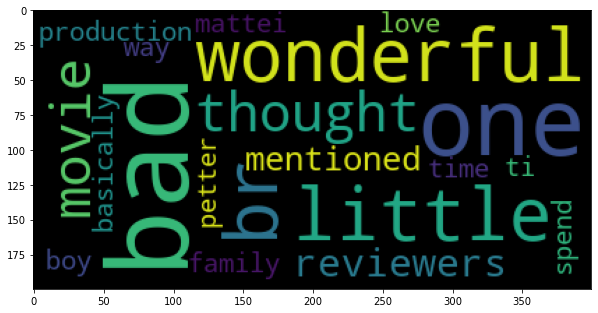

In [28]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [29]:
#create a seperate word cloud on positive and negative label...

In [30]:
df1 = messages.message[messages.label==0] 

In [31]:
cloud=WordCloud(max_words=20,stopwords=stopwords.words("english")).generate(str(messages[messages.label==0]))
# negative label

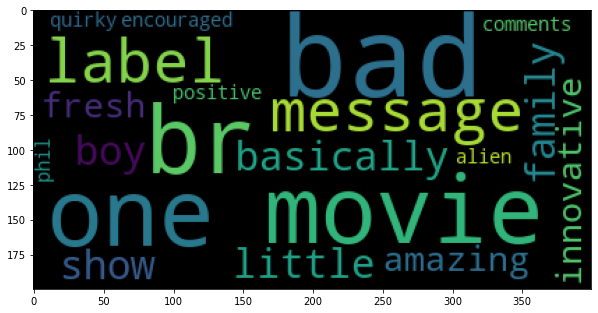

In [32]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [33]:
cloud2=WordCloud(max_words=20, stopwords=stopwords.words("english")).generate(str(messages.message[messages.label==1]))
# positive label

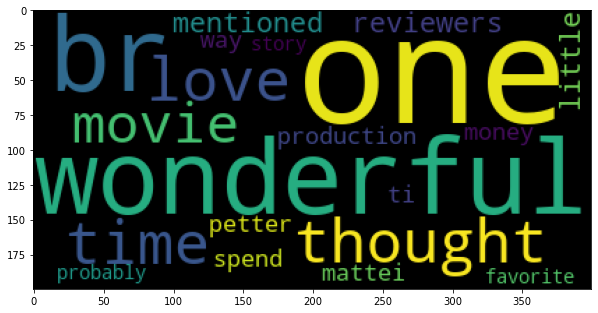

In [34]:
plt.figure(figsize = (10,10))
plt.imshow(cloud2)

In [35]:
import string

In [36]:
string.punctuation  #shows me the punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def text_process(mess):
    """
    1.reomve the puctuation
    2.remove the stopwords
    3.return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if word not in stopwords.words("english")]

In [38]:
messages['message'].apply(text_process)

0        [one, reviewers, mentioned, watching, 1, oz, e...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: message, Length: 50000, dtype: object

In [39]:
from sklearn.feature_extraction.text import CountVectorizer #use to count each and every word

bow_transformer = CountVectorizer(analyzer = text_process).fit(messages["message"])

In [40]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000024282DDCEE0>)

In [41]:
bow_transformer.vocabulary_

{'one': 114477,
 'reviewers': 134201,
 'mentioned': 101307,
 'watching': 173946,
 '1': 90,
 'oz': 117289,
 'episode': 53060,
 'youll': 179968,
 'hooked': 76413,
 'right': 134852,
 'exactly': 54540,
 'happened': 71847,
 'mebr': 100475,
 'br': 22378,
 'first': 59825,
 'thing': 160687,
 'struck': 154084,
 'brutality': 23876,
 'unflinching': 168292,
 'scenes': 139535,
 'violence': 172065,
 'set': 142924,
 'word': 177841,
 'go': 67078,
 'trust': 165560,
 'show': 144965,
 'faint': 56439,
 'hearted': 73148,
 'timid': 162235,
 'pulls': 127952,
 'punches': 128033,
 'regards': 132044,
 'drugs': 48574,
 'sex': 143136,
 'hardcore': 72001,
 'classic': 31784,
 'use': 169972,
 'wordbr': 177844,
 'called': 25855,
 'nickname': 110075,
 'given': 66646,
 'oswald': 115857,
 'maximum': 99633,
 'security': 141252,
 'state': 152134,
 'penitentary': 119836,
 'focuses': 61018,
 'mainly': 97050,
 'emerald': 51599,
 'city': 31516,
 'experimental': 55343,
 'section': 141223,
 'prison': 126165,
 'cells': 28379,
 '

In [42]:
len(bow_transformer.vocabulary_)  #if convert this to TDM ,my TDM will have 9422 columns

181543

In [43]:
messages_bow = bow_transformer.transform(messages.message)

In [44]:
messages_bow.shape

(50000, 181543)

In [45]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

# DECISION TREE

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(messages_bow,messages.label,test_size=.2)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=7)

In [92]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[2655,  633],
       [2260, 4452]], dtype=int64)

In [93]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

71.07

In [94]:
# criterion="entropy",max_depth=4 --------  Accuracy =68 %
# criterion="entropy",max_depth=5 --------  Accuracy = 69.6 %
# criterion="entropy",max_depth=6 --------  Accuracy = 96.84 %
# criterion="entropy",max_depth=7 --------  Accuracy = 71.07 %

In [95]:
# Decision Tree gives accuracy of 71.07 %...

# RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(n_estimators =150, max_depth=4 )

In [82]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=150)

In [83]:
#rf.fit(cr_x_train , cr_y_train)
pred_rf=rf.predict(x_test)

tab_rf= confusion_matrix(pred_rf,y_test)
tab_rf

array([[4013,  999],
       [ 902, 4086]], dtype=int64)

In [84]:
Accuracy =tab_rf.diagonal().sum()/tab_rf.sum()
Accuracy

0.8099

In [79]:
# n_estimators = 100 ----------- accuracy=85.5%
# n_estimators =100, max_depth=6 ------ accuracy=81.87%
# n_estimators = 150 --------- accuracy=85.5%
# n_estimators =150, max_depth=4 --- accuracy=81.62%
# n_estimators =150, max_depth=5 --- accuracy=81.25 %
# n_estimators =200, max_depth=5 --- accuracy=83.05%
# n_estimators =200, max_depth=6 --- accuracy=83.26%

In [ ]:
# Random Forest gives accuracy of 85.5%...

# NAIVE BAYES

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [55]:
naive_bayes = MultinomialNB()

In [56]:
naive_bayes.fit(x_train,y_train)
pred_nb = naive_bayes.predict(x_test)
tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[4356,  843],
       [ 559, 4242]], dtype=int64)

In [58]:
Accuracy=tab_nb.diagonal().sum()/tab_nb.sum()
Accuracy

0.8598

In [ ]:
# Naive Bayes gives accuracy of 85.98%...

# Conclusion

In [80]:
#On applying Decision Tree, Random Forest, Naive Bayes above we get best  Accuracy of 85.98% from Naive Bayes...